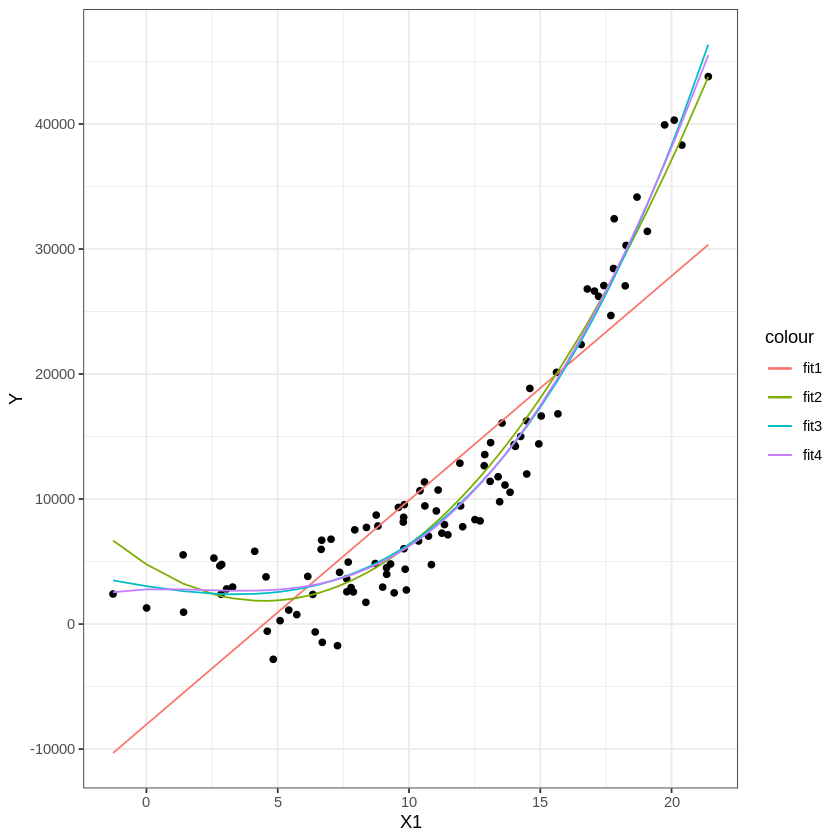

In [13]:
 ## created by Joran Lokkerbol - 31-03-2019


library(ggplot2)

## SECTION 1
rm(list=ls())
set.seed(456)

# define datagenerating process
X1 <- rnorm(100,10,5)
e <- rnorm(100,0,2500)
Y <- 2530 + 20*X1 - 10*X1^2 + 5*X1^3+e
df <- as.data.frame(cbind(Y,X1))

# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE <- numeric()
for (i in 1:20) {
        assign(paste("lm",i,sep=""), lm(Y~poly(X1,i, raw=T), df))        
        prediction <-  predict(lm(Y~poly(X1,i, raw=T), df))        
        RMSE <- c(RMSE,sqrt(mean((Y-prediction)^2)))
}

# plot different models
fits <- as.data.frame(cbind(X1, predict(lm1), predict(lm2), predict(lm3), predict(lm4)))
names(fits) <- c("X1", "fit1", "fit2", "fit3", "fit4")

ggplot(data=df, aes(x = X1, y = Y))+
        geom_point() + theme_bw()  + 
        geom_line(data = fits, aes(x = X1, y = fit1, colour = "fit1")) + 
        geom_line(data = fits, aes(x = X1, y = fit2, colour = "fit2")) + 
        geom_line(data = fits, aes(x = X1, y = fit3, colour = "fit3")) + 
        geom_line(data = fits, aes(x = X1, y = fit4, colour = "fit4")) 


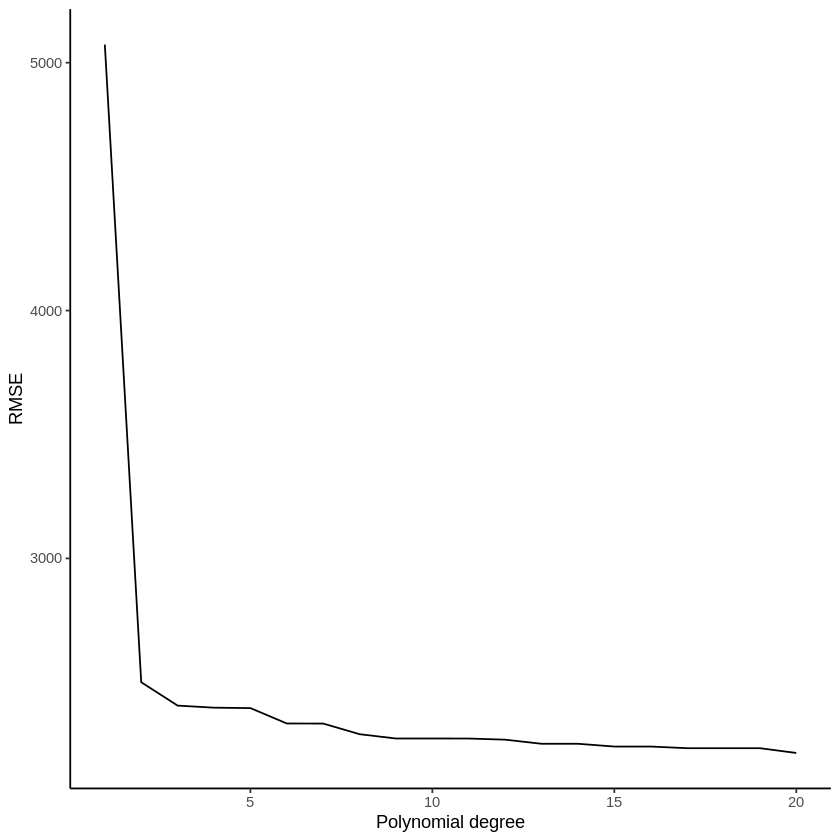

In [14]:
#plot error (RMSE) for different degrees of complexity 
RMSE <- as.data.frame(RMSE)
ggplot(data=RMSE, aes(x=1:20,y=RMSE))+geom_line()+theme_classic()+xlab("Polynomial degree")


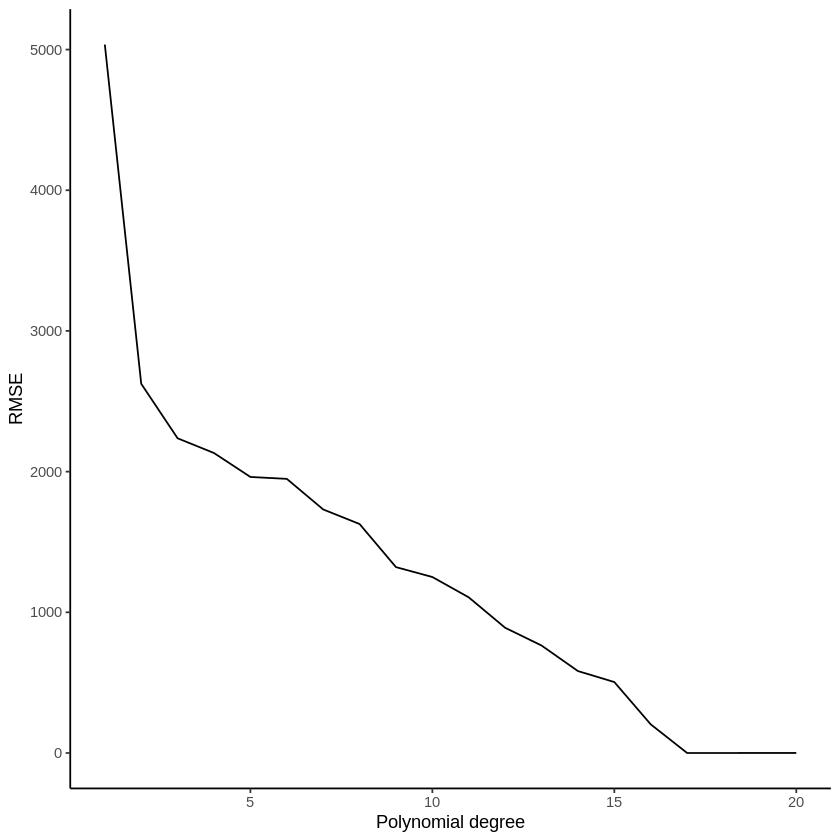

In [15]:
## SECTION 2
rm(list=ls())
set.seed(456)

# define datagenerating process
X1 <- rnorm(100,10,5)
X2 <- rnorm(100,10,5)
X3 <- rnorm(100,10,5)
X4 <- rnorm(100,10,5)
X5 <- rnorm(100,10,5)
X6 <- rnorm(100,10,5)
X7 <- rnorm(100,10,5)
e <- rnorm(100,0,2500)
Y <- 2530 + 20*X1 - 10*X1^2 + 5*X1^3+e
df <- as.data.frame(cbind(Y,X1,X2,X3,X4,X5,X6,X7))

# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE <- numeric()
for (i in 1:20) {
assign(paste("lm",i,sep=""), lm(Y~poly(X1,i, raw=T)+poly(X2,i, raw=T)+poly(X3,i, raw=T)+poly(X4,i, raw=T)+poly(X5,i, raw=T)+poly(X6,i, raw=T)+poly(X7,i, raw=T), df))        
prediction <-  predict(lm(Y~poly(X1,i, raw=T)+poly(X2,i, raw=T)+poly(X3,i, raw=T)+poly(X4,i, raw=T)+poly(X5,i, raw=T)+poly(X6,i, raw=T)+poly(X7,i, raw=T), df))        
RMSE <- c(RMSE,sqrt(mean((Y-prediction)^2)))
}

#plot training error (RMSE) for different degrees of complexity 
RMSE <- as.data.frame(RMSE)
ggplot(data=RMSE, aes(x=1:20,y=RMSE))+geom_line()+theme_classic()+xlab("Polynomial degree")

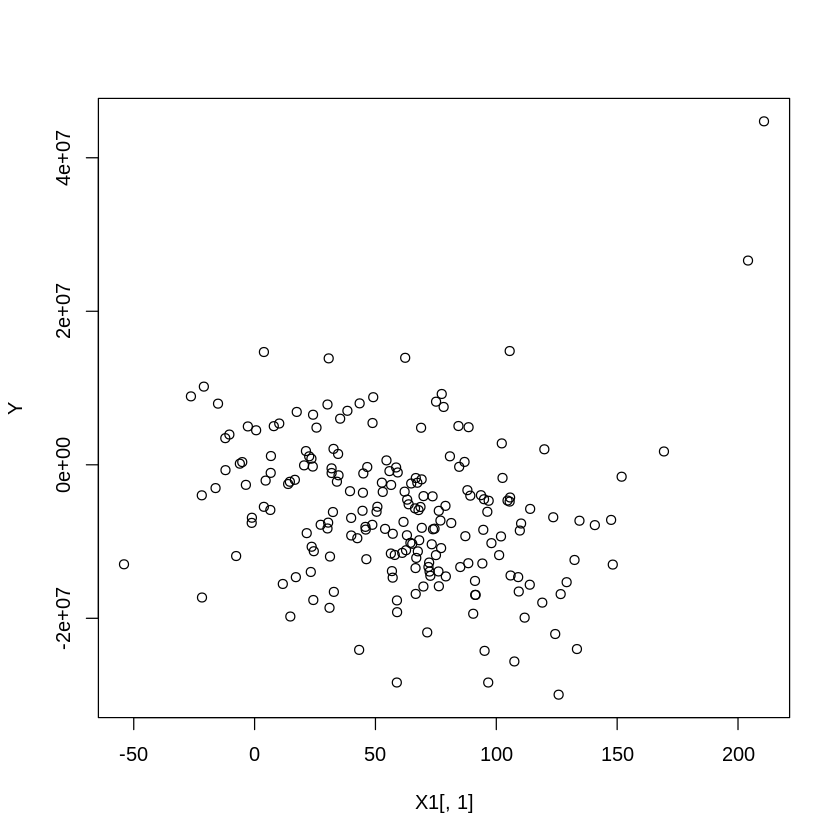

In [17]:
## SECTION 3
rm(list=ls())
set.seed(45)

# define datagenerating process
X1_tot <- rnorm(250,60,40)
e_tot <- rnorm(250,0,8000000)
X1_tot <- as.data.frame(poly(X1_tot,20,raw=TRUE))
X1 <- X1_tot[1:200,]
X1_val <- X1_tot[201:250,]
e <- e_tot[1:200]
e_val <- e_tot[201:250]
Y <- 253 + 20*X1[,1] - 2500*X1[,1]^2 + 15*X1[,1]^3+e
Y_val <- 253 + 20*X1_val[,1] - 2500*X1_val[,1]^2 + 15*X1_val[,1]^3+e_val

df <- as.data.frame(cbind(Y,X1))
plot(X1[,1],Y)

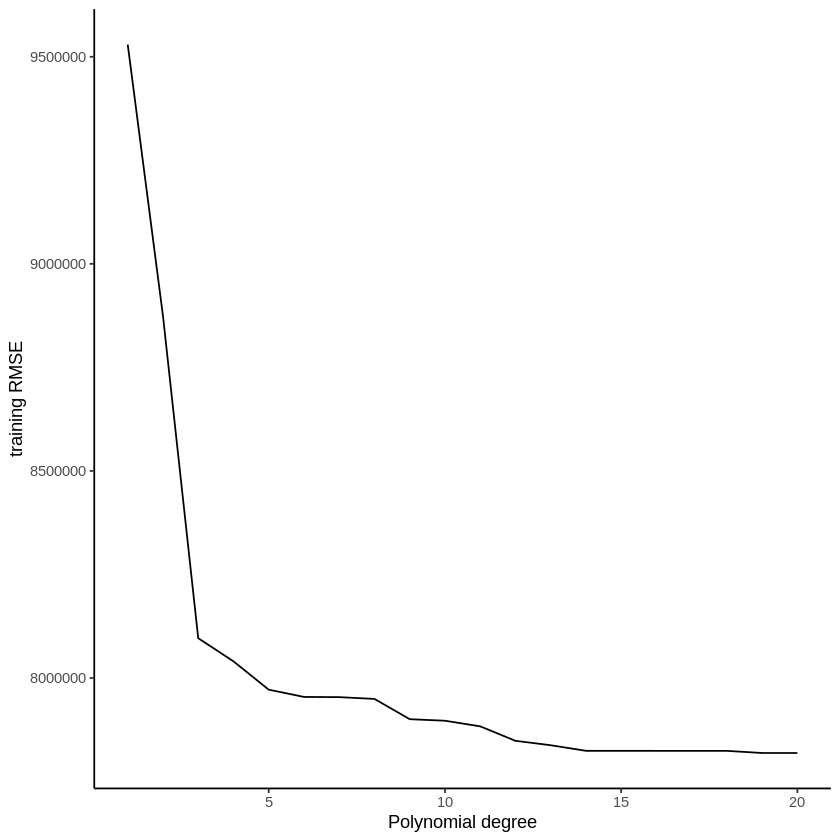

In [18]:
# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE_train <- numeric()
for (i in 1:20) {
        assign(paste("lm",i,sep=""), lm(Y~., df[,1:(i+1)]))        
        prediction <-  predict(lm(Y~., df[,1:(i+1)]))        
        RMSE_train <- c(RMSE_train,sqrt(mean((Y-prediction)^2)))
}

#plot training error (RMSE) for different degrees of complexity 
RMSE_train <- as.data.frame(RMSE_train)
ggplot(data=RMSE_train, aes(x=1:20,y=RMSE_train))+geom_line()+theme_classic()+xlab("Polynomial degree")+ylab("training RMSE")

Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, newdata = df_val):
“prediction from a rank-deficient fit may be misleading”


polynomial,RMSE_val,text
<int>,<dbl>,<chr>
3,8121035,minimum


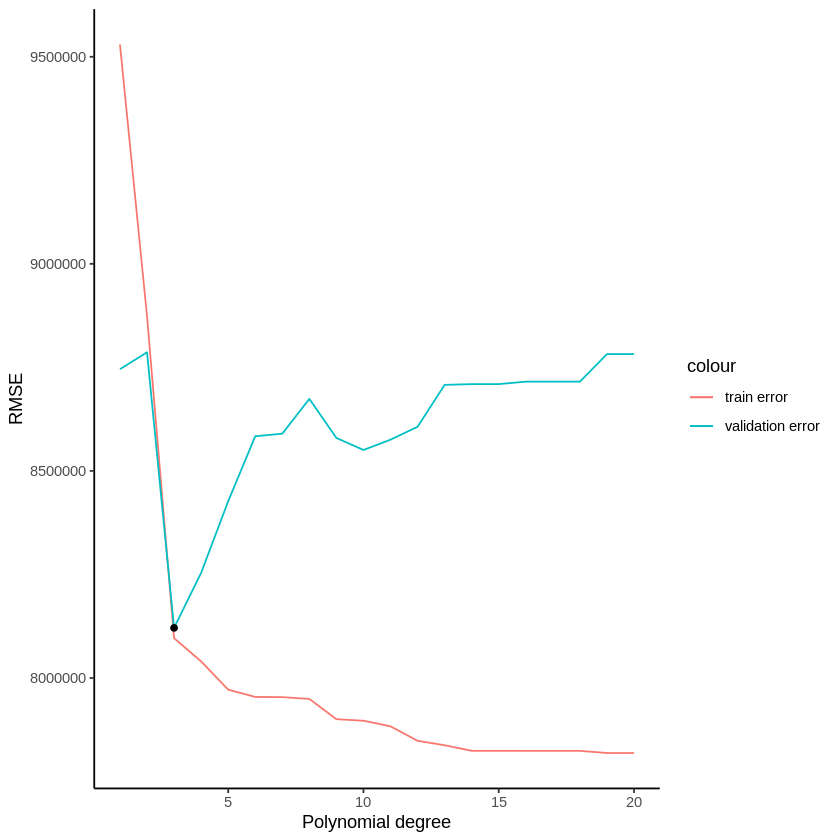

In [19]:
### compare to validation data
df_val <- as.data.frame(cbind(Y_val,X1_val))

# generate test_RMSE for each of the 20 models
RMSE_val <- numeric()
for (i in 1:20) {
        model <- lm(Y~., df[,1:(i+1)])
        prediction_val <-  predict(model, newdata = df_val)        
        RMSE_val <- c(RMSE_val,sqrt(mean((Y_val-prediction_val)^2)))
}

#plot training error and test error (RMSE) for different degrees of complexity 
library(ggplot2)
RMSE <- as.data.frame(cbind("polynomial" = 1:20, RMSE_train,RMSE_val))
labels <- data.frame(polynomial = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "polynomial"], RMSE_val = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "RMSE_val"], text = "minimum")
labels

ggplot(data=RMSE, aes(polynomial))+
        geom_line(aes(y=RMSE_train, colour="train error"))+
        geom_line(aes(y=RMSE_val, colour="validation error"))+
        theme_classic()+xlab("Polynomial degree")+
        ylab("RMSE") +
        geom_point(data = labels, aes(polynomial, RMSE_val))

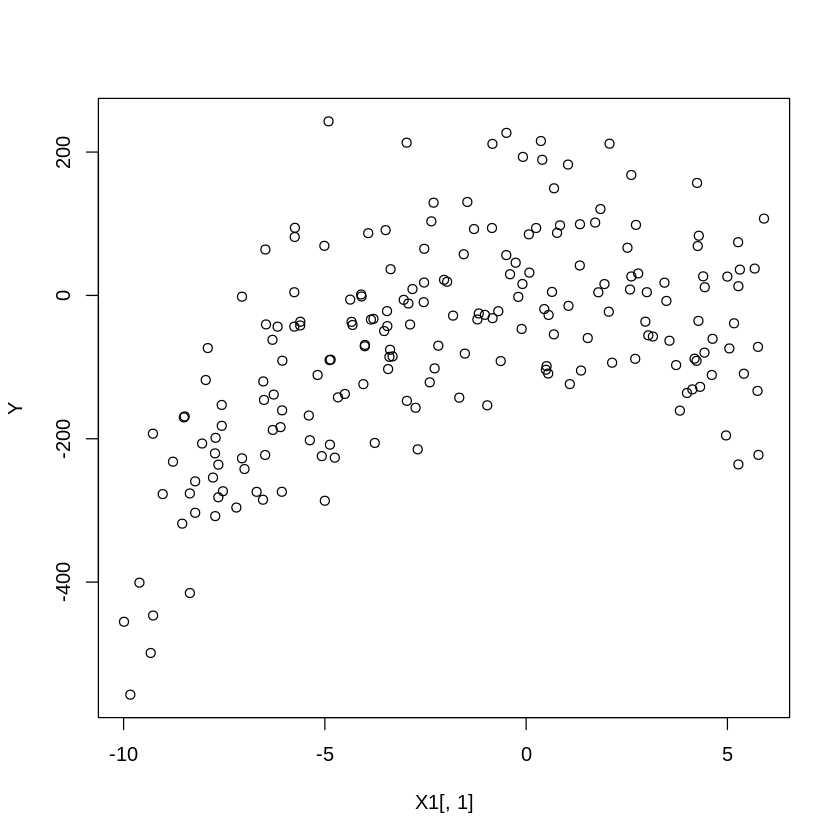

In [20]:
## SECTION 4
rm(list=ls())
set.seed(123)

# define datagenerating process
X1_tot <- runif(250,-10,6)
e_tot <- rnorm(250,0,100)
X1_tot <- as.data.frame(poly(X1_tot,20, raw=T))
names(X1_tot) <- paste("X",1:20, sep = "")
X1 <- X1_tot[1:200,]
X1_val <- X1_tot[201:250,]
e <- e_tot[1:200]
e_val <- e_tot[201:250]
Y <- 25 + 2*X1[,1] - 4*X1[,1]^2 + e
Y_val <- 25 + 2*X1_val[,1] - 4*X1_val[,1]^2 + e_val

df <- as.data.frame(cbind(Y,X1))
plot(X1[,1],Y)

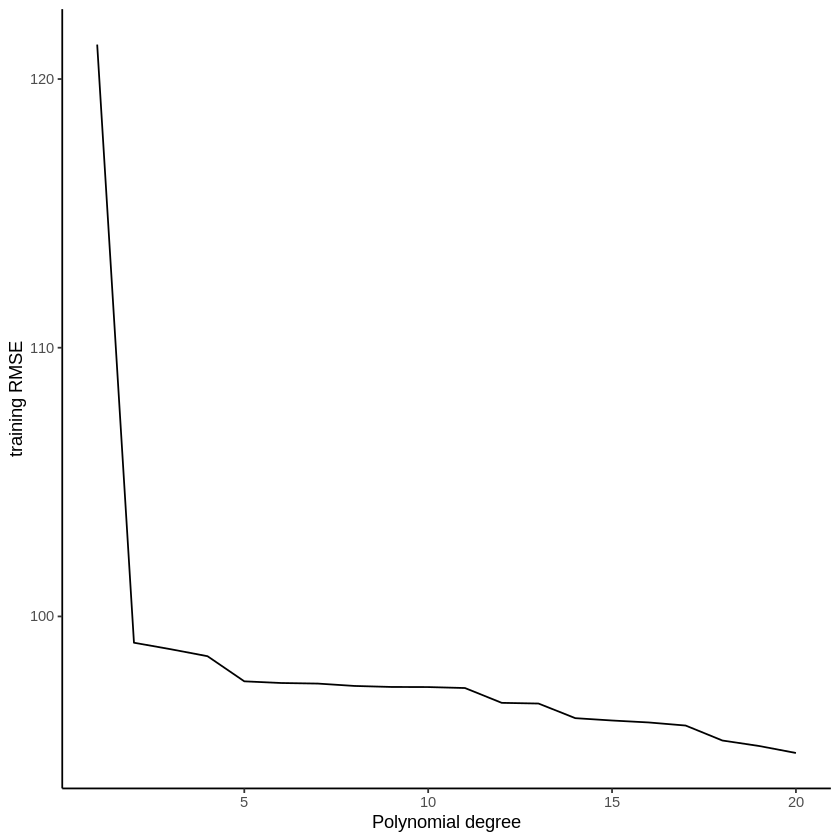

In [21]:
# estimate linear models with increasingly higher polynomial terms, save predictions, calculate RMSE
RMSE_train <- numeric()
for (i in 1:20) {
        assign(paste("lm",i,sep=""), lm(Y~., df[,1:(i+1)]))        
        prediction <-  predict(lm(Y~., df[,1:(i+1)]))        
        RMSE_train <- c(RMSE_train,sqrt(mean((Y-prediction)^2)))
}

#plot training error (RMSE) for different degrees of complexity 
library(ggplot2)
RMSE_train <- as.data.frame(RMSE_train)
ggplot(data=RMSE_train, aes(x=1:20,y=RMSE_train))+geom_line()+theme_classic()+xlab("Polynomial degree")+ylab("training RMSE")

polynomial,RMSE_val,text
<int>,<dbl>,<chr>
6,103.2201,minimum


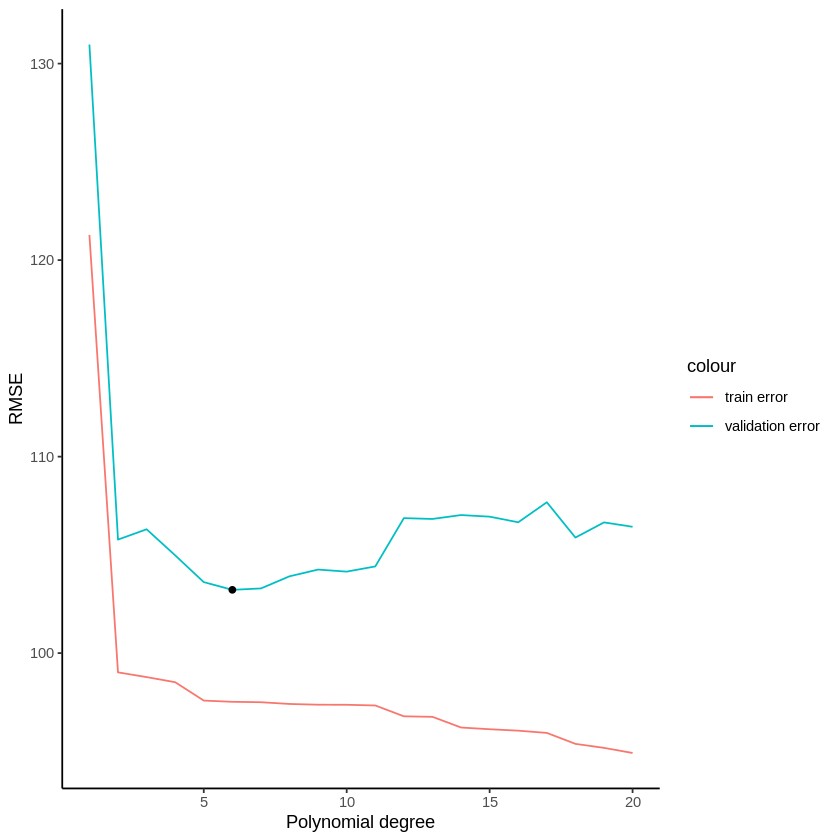

In [22]:
### comparing to new (test) data
df_val <- as.data.frame(cbind(Y_val,X1_val))

# generate test_RMSE for each of the 20 models
RMSE_val <- numeric()
for (i in 1:20) {
        model <- lm(Y~., df[,1:(i+1)])
        prediction_val <-  predict(model, newdata = df_val)        
        RMSE_val <- c(RMSE_val,sqrt(mean((Y_val-prediction_val)^2)))
}

#plot training error and test error (RMSE) for different degrees of complexity 
RMSE <- as.data.frame(cbind("polynomial" = 1:20, RMSE_train,RMSE_val))
labels <- data.frame(polynomial = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "polynomial"], RMSE_val = RMSE[which(RMSE$RMSE_val==min(RMSE$RMSE_val)), "RMSE_val"], text = "minimum")
labels

ggplot(data=RMSE, aes(polynomial))+
        geom_line(aes(y=RMSE_train, colour="train error"))+
        geom_line(aes(y=RMSE_val, colour="validation error"))+
        theme_classic()+xlab("Polynomial degree")+
        ylab("RMSE") +
        geom_point(data = labels, aes(polynomial, RMSE_val))